## 1.4　ニューラルネットワークで問題を解く

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sys.path.append('../input/deeplearningfromscratch2master/deep-learning-from-scratch-2-master')

In [3]:
from common.layers import Affine, Sigmoid, SoftmaxWithLoss
from common.trainer import Trainer

### 1.4.2　ニューラルネットワークの実装

In [4]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)
        
        self.layers = [Affine(W1, b1), Sigmoid(), Affine(W2, b2)]
        self.loss_layer = SoftmaxWithLoss()
        
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
            
        print('params:', len(self.params))
        print('')
        print('W1:', self.params[0].shape)
        print(self.params[0])
        print('')
        print('b1:', self.params[1].shape)
        print(self.params[1])
        print('')
        print('W2:', self.params[2].shape)
        print(self.params[2])
        print('')
        print('b2:', self.params[3].shape)
        print(self.params[3])
            
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss
    
    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

逆伝播で更新した `Affine` レイヤの勾配が、3 点リーダーの深いコピーによって、`TwoLayerNet` の `self.grads` にも反映されるようになっている。<br>
これは代入ではなく、上書きにのみ有効である。

In [5]:
Affine_params = np.array([1, 2, 3])
TwoLayerNet_params = Affine_params
print(Affine_params)
print(TwoLayerNet_params)

[1 2 3]
[1 2 3]


In [6]:
Affine_params[...] = np.array([4, 5, 6])
print(Affine_params)
print(TwoLayerNet_params)

[4 5 6]
[4 5 6]


一方、浅いコピーだと以下のようになる。

In [7]:
Affine_params = np.array([1, 2, 3])
TwoLayerNet_params = Affine_params
print(Affine_params)
print(TwoLayerNet_params)

[1 2 3]
[1 2 3]


In [8]:
Affine_params = np.array([4, 5, 6])
print(Affine_params)
print(TwoLayerNet_params)

[4 5 6]
[1 2 3]


### 1.4.3　学習用のソースコード

In [9]:
from common.optimizer import SGD

In [10]:
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

In [11]:
x = np.load('../input/spiral/spiral/x.npy')
t = np.load('../input/spiral/spiral/t.npy')

print(x.shape)
print(t.shape)

(300, 2)
(300, 3)


In [12]:
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

params: 4

W1: (2, 10)
[[ 0.00285265 -0.00222643 -0.00193683 -0.0004817   0.00520584 -0.00095291
  -0.02199708 -0.01210766  0.0081587   0.00585074]
 [ 0.00287996  0.00710612 -0.00794521  0.00288518  0.00683323  0.01270689
  -0.01882802 -0.0079536  -0.0118656   0.00051922]]

b1: (10,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

W2: (10, 3)
[[-0.00619715  0.00171832 -0.01142656]
 [ 0.00783299 -0.00332768  0.01079768]
 [ 0.00076889  0.02074829  0.01572071]
 [-0.01369476  0.01565417 -0.01888715]
 [-0.00174597  0.00442373 -0.00722995]
 [ 0.00149084 -0.00167925 -0.00407555]
 [ 0.00018719  0.00092187  0.00096997]
 [ 0.01297504  0.0031038  -0.00479886]
 [ 0.0046911   0.00048367 -0.00835348]
 [-0.00244343 -0.02250715  0.02017338]]

b2: (3,)
[0. 0. 0.]


In [13]:
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

print('data_size:', data_size)
print('batch_size:', batch_size)
print('max_iters | epoch:', max_iters)

data_size: 300
batch_size: 30
max_iters | epoch: 10


In [14]:
import pandas as pd

In [15]:
for epoch in range(max_epoch):
        idx = np.random.permutation(data_size)
        x = x[idx]
        t = t[idx]
        
        for iters in range(max_iters):
            batch_x = x[iters*batch_size:(iters+1)*batch_size]
            batch_t = t[iters*batch_size:(iters+1)*batch_size]
            
            loss = model.forward(batch_x, batch_t)
            model.backward()
            optimizer.update(model.params, model.grads)
            
            total_loss += loss
            loss_count += 1
            
            if (iters+1) % 10 == 0:
                avg_loss = total_loss / loss_count
                print('| epoch %d | iter %d / %d | loss %.2f' % (epoch+1, iters+1, max_iters, avg_loss))
                loss_list.append(avg_loss)
                total_loss, loss_count = 0, 0

| epoch 1 | iter 10 / 10 | loss 1.14
| epoch 2 | iter 10 / 10 | loss 1.14
| epoch 3 | iter 10 / 10 | loss 1.13
| epoch 4 | iter 10 / 10 | loss 1.12
| epoch 5 | iter 10 / 10 | loss 1.16
| epoch 6 | iter 10 / 10 | loss 1.14
| epoch 7 | iter 10 / 10 | loss 1.13
| epoch 8 | iter 10 / 10 | loss 1.12
| epoch 9 | iter 10 / 10 | loss 1.11
| epoch 10 | iter 10 / 10 | loss 1.12
| epoch 11 | iter 10 / 10 | loss 1.10
| epoch 12 | iter 10 / 10 | loss 1.09
| epoch 13 | iter 10 / 10 | loss 1.04
| epoch 14 | iter 10 / 10 | loss 1.01
| epoch 15 | iter 10 / 10 | loss 0.98
| epoch 16 | iter 10 / 10 | loss 0.94
| epoch 17 | iter 10 / 10 | loss 0.92
| epoch 18 | iter 10 / 10 | loss 0.89
| epoch 19 | iter 10 / 10 | loss 0.86
| epoch 20 | iter 10 / 10 | loss 0.89
| epoch 21 | iter 10 / 10 | loss 0.82
| epoch 22 | iter 10 / 10 | loss 0.84
| epoch 23 | iter 10 / 10 | loss 0.79
| epoch 24 | iter 10 / 10 | loss 0.80
| epoch 25 | iter 10 / 10 | loss 0.78
| epoch 26 | iter 10 / 10 | loss 0.78
| epoch 27 | iter 10 

`np.random.permutaion()` は、$0$ から $N-1$ までのランダムな並びを作成して返す。

In [16]:
print(np.random.permutation(10))
print(np.random.permutation(10))

[7 4 0 2 5 8 9 3 1 6]
[9 2 0 4 3 1 6 5 8 7]


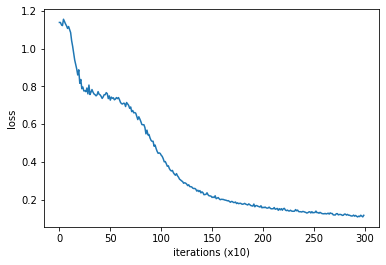

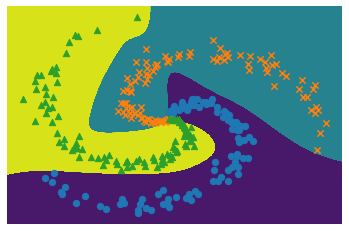

In [17]:
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('iterations (x10)')
plt.ylabel('loss')
plt.show()

h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

x = np.load('../input/spiral/spiral/x.npy')
t = np.load('../input/spiral/spiral/t.npy')

N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

横軸は、`epoch`（10 `iters`）の表記になっている。

### 1.4.4　Traner クラス

`model` と `optimizer` 作成後の学習過程を、`Trainer` クラスにまとめる。

In [18]:
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

In [19]:
x = np.load('../input/spiral/spiral/x.npy')
t = np.load('../input/spiral/spiral/t.npy')

In [20]:
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

params: 4

W1: (2, 10)
[[-0.00242774 -0.00408483  0.0022554   0.01319797 -0.01001939 -0.00669639
  -0.00347048 -0.01807619 -0.00279395  0.00619281]
 [-0.0101171   0.00432937 -0.02102669  0.00621348 -0.01123467  0.00884312
   0.01129091 -0.01470659 -0.00418886  0.00616983]]

b1: (10,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

W2: (10, 3)
[[-5.20259022e-03  9.12837108e-03  1.86551405e-02]
 [-4.05165359e-03 -4.35196969e-03 -6.02077599e-03]
 [ 1.38696232e-02 -3.35273240e-03  1.27020173e-02]
 [ 1.67753996e-02  1.10411481e-03  1.12024543e-02]
 [ 1.35773543e-02  1.35713121e-03 -9.37360365e-03]
 [ 8.11593350e-03  1.49615808e-02  8.90164423e-03]
 [ 3.10815110e-03  9.86568050e-03 -8.73229002e-05]
 [ 1.09559693e-02  5.81913462e-03  9.29377709e-03]
 [ 4.04259661e-03 -4.30380573e-03 -3.61919874e-03]
 [ 1.69825842e-02 -8.87789753e-04 -4.15597110e-03]]

b2: (3,)
[0. 0. 0.]


| epoch 1 |  iter 1 / 10 | time 0[s] | loss 1.10
| epoch 2 |  iter 1 / 10 | time 0[s] | loss 1.13
| epoch 3 |  iter 1 / 10 | time 0[s] | loss 1.17
| epoch 4 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 5 |  iter 1 / 10 | time 0[s] | loss 1.17
| epoch 6 |  iter 1 / 10 | time 0[s] | loss 1.13
| epoch 7 |  iter 1 / 10 | time 0[s] | loss 1.14
| epoch 8 |  iter 1 / 10 | time 0[s] | loss 1.13
| epoch 9 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 10 |  iter 1 / 10 | time 0[s] | loss 1.14
| epoch 11 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 12 |  iter 1 / 10 | time 0[s] | loss 1.11
| epoch 13 |  iter 1 / 10 | time 0[s] | loss 1.14
| epoch 14 |  iter 1 / 10 | time 0[s] | loss 1.06
| epoch 15 |  iter 1 / 10 | time 0[s] | loss 1.03
| epoch 16 |  iter 1 / 10 | time 0[s] | loss 0.99
| epoch 17 |  iter 1 / 10 | time 0[s] | loss 0.95
| epoch 18 |  iter 1 / 10 | time 0[s] | loss 0.91
| epoch 19 |  iter 1 / 10 | time 0[s] | loss 0.91
| epoch 20 |  iter 1 / 10 | time 0[s] | loss 0.85
| epoch 2

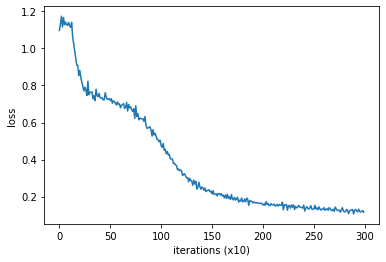

In [21]:
trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval=10)
trainer.plot()